In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
first_region = [0.2, 1.5]
second_region = [3, 4]
total_region = first_region[1]-first_region[0] + second_region[1]-second_region[0]
scale = 3
n_samples = 10000

In [18]:
exp_samples = np.random.exponential(scale, n_samples)
exp_samples = exp_samples[((exp_samples < first_region[1]) & (exp_samples > first_region[0])) |
                          ((exp_samples < second_region[1]) & (exp_samples > second_region[0]))]

In [19]:
unif_samples = np.asarray([np.random.choice([np.random.uniform(*first_region),
                                 np.random.uniform(*second_region)],
                                 p=[(first_region[1]-first_region[0])/total_region,
                                    (second_region[1]-second_region[0])/total_region]
                                 ) for _ in range(n_samples)])
weights = 1/scale * np.exp(-unif_samples/scale) * total_region

Text(0, 0.5, 'number of entries (weighted)')

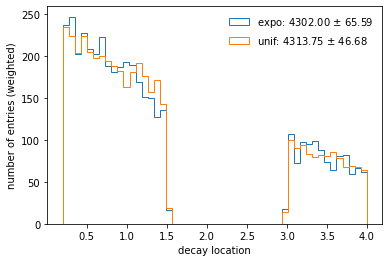

In [20]:
plt.hist(exp_samples, 
         bins=50, 
         label=f'expo: {len(exp_samples):.2f} $\pm$ {np.sqrt(len(exp_samples)):.2f}', 
         histtype='step');
plt.hist(unif_samples, 
         weights=weights, 
         bins=50, 
         label=f'unif: {weights.sum():.2f} $\pm$ {np.sqrt((weights**2).sum()):.2f}', 
         histtype='step');
plt.legend(frameon=False)
plt.xlabel('decay location')
plt.ylabel('number of entries (weighted)')

In [32]:
relative_uncertainty_expo = []
relative_uncertainty_unif = []
scales = [0.1, 0.3, 0.5, 1, 1.5, 3, 5]

for scale in scales:
    exp_samples = np.random.exponential(scale, n_samples)
    exp_samples = exp_samples[((exp_samples < first_region[1]) & (exp_samples > first_region[0])) |
                          ((exp_samples < second_region[1]) & (exp_samples > second_region[0]))]
    relative_uncertainty_expo.append(1/np.sqrt(len(exp_samples)))
    
    unif_samples = np.asarray([np.random.choice([np.random.uniform(*first_region),
                                 np.random.uniform(*second_region)],
                                 p=[(first_region[1]-first_region[0])/total_region,
                                    (second_region[1]-second_region[0])/total_region]
                                 ) for _ in range(n_samples)])
    weights = 1/scale * np.exp(-unif_samples/scale) * total_region
    relative_uncertainty_unif.append(np.sqrt((weights**2).sum())/weights.sum())

Text(0, 0.5, 'relative uncertainty on the integral')

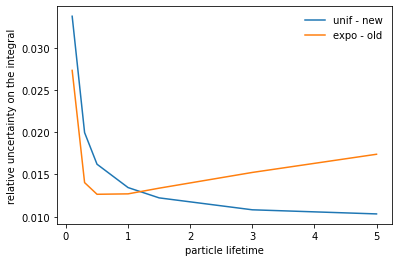

In [33]:
plt.plot(scales, relative_uncertainty_unif, label='unif - new')
plt.plot(scales, relative_uncertainty_expo, label='expo - old')
plt.legend(frameon=False)
plt.xlabel('particle lifetime')
plt.ylabel('relative uncertainty on the integral')

# Different importance samplings with different lifetimes

In [35]:
l_is = [0.5, 1.5, 5]
exp_samples_is = [np.random.exponential(scale, n_samples) for scale in l_is]

(0.0, 0.03)

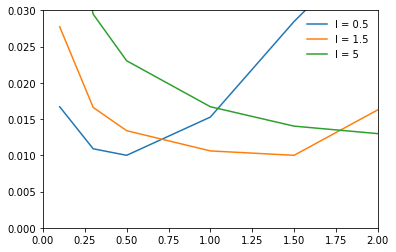

In [39]:
relative_uncertainty_is = []
scales = [0.1, 0.3, 0.5, 1, 1.5, 3, 5]

for l in l_is:
    samples = np.random.exponential(l, n_samples)
    uncertainties = []
    for scale in scales:
        weights = (1/scale * np.exp(-samples/scale)) / (1/l * np.exp(-samples/l))
        uncertainties.append(np.sqrt((weights**2).sum())/weights.sum())
        
    plt.plot(scales, uncertainties, label=f'l = {l}')

plt.legend(frameon=False)
plt.xlim(0, 2)
plt.ylim(0, 0.03)

# Simplified expo with only one region

In [162]:
first_region = [0.2, 1.5]
total_region = first_region[1]-first_region[0]
scale = 0.1
n_samples = 10000

In [163]:
np.exp(-first_region[0]/scale) - np.exp(-first_region[1]/scale)

0.1353349773342922

In [164]:
exp_samples = np.random.exponential(scale, n_samples)
exp_samples = exp_samples[(exp_samples < first_region[1]) & (exp_samples > first_region[0])]
exp_weights = np.ones(len(exp_samples)) / n_samples

In [165]:
unif_samples = np.random.uniform(*first_region, n_samples)
unif_weights = 1/scale * np.exp(-unif_samples/scale) * total_region / n_samples

In [166]:
def inverse_cdf(x, l, a, b):
    return -l*np.log((1-x)*np.exp(-a/l) + x*np.exp(-b/l))

In [175]:
unif_numbers = np.random.uniform(0, 1, n_samples)
exp_trunc_samples = inverse_cdf(unif_numbers, scale, *first_region)
exp_trunc_weights = np.ones(len(exp_trunc_samples)) * (np.exp(-first_region[0]/scale) - np.exp(-first_region[1]/scale)) / n_samples

In [179]:
for name, samples, weights in zip(('expo', 'unif', 'expo_trunc'),
                                 (exp_samples, unif_samples, exp_trunc_samples),                                 
                                 (exp_weights, unif_weights, exp_trunc_weights)):
    print(name, np.average(samples, weights=weights, ))

expo 0.3002245005057886
unif 0.29912306160018265
expo_trunc 0.29892435634991565


Text(0, 0.5, 'number of entries (weighted)')

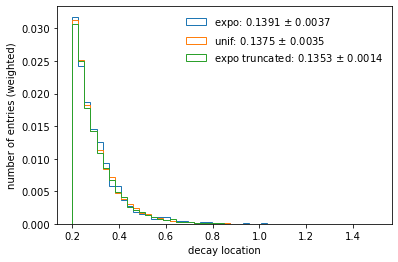

In [177]:
this_bins = 50
this_range = first_region
plt.hist(exp_samples,
         weights=exp_weights,
         label=f'expo: {exp_weights.sum():.4f} $\pm$ {np.sqrt((exp_weights**2).sum()):.4f}\n',
         bins=this_bins,
         range=this_range,
         histtype='step');
plt.hist(unif_samples,
         weights=unif_weights,
         label=f'unif: {unif_weights.sum():.4f} $\pm$ {np.sqrt((unif_weights**2).sum()):.4f}\n', 
         bins=this_bins,
         range=this_range,
         histtype='step');
plt.hist(exp_trunc_samples, 
         weights=exp_trunc_weights,
         label=f'expo truncated: {exp_trunc_weights.sum():.4f} $\pm$ {np.sqrt((exp_trunc_weights**2).sum()):.4f}\n', 
         bins=this_bins,
         range=this_range,
         histtype='step');
plt.legend(frameon=False)
plt.xlabel('decay location')
plt.ylabel('number of entries (weighted)')

In [159]:
relative_uncertainty_expo = []
relative_uncertainty_unif = []
relative_uncertainty_expo_no_trunc = []

unif_numbers = np.random.uniform(0, 1, n_samples)
scales = [0.1, 0.3, 0.5, 1, 1.5, 3, 5]

for scale in scales:
    exp_samples = np.random.exponential(scale, n_samples)
    exp_samples = exp_samples[(exp_samples < first_region[1]) & (exp_samples > first_region[0])]
    relative_uncertainty_expo.append(1/np.sqrt(len(exp_samples)))
    
    unif_samples = np.random.uniform(*first_region, n_samples)
    weights = 1/scale * np.exp(-unif_samples/scale) * total_region
    relative_uncertainty_unif.append(np.sqrt((weights**2).sum())/weights.sum())
    
    true_samples = inverse_cdf(unif_numbers, scale, *first_region)
    relative_uncertainty_expo_no_trunc.append(1/np.sqrt(len(true_samples)))

Text(0, 0.5, 'relative uncertainty on the integral')

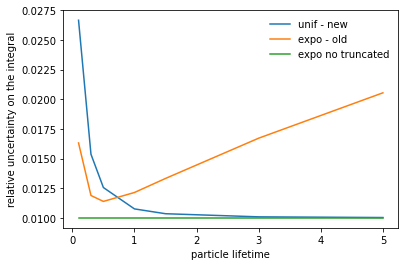

In [106]:
plt.plot(scales, relative_uncertainty_unif, label='unif - new')
plt.plot(scales, relative_uncertainty_expo, label='expo - old')
plt.plot(scales, relative_uncertainty_expo_no_trunc, label='expo no truncated')
plt.legend(frameon=False)
plt.xlabel('particle lifetime')
plt.ylabel('relative uncertainty on the integral')